# 07. Liczby rzeczywiste. Arytmetyka komputerowa


__Treści kształcenia:__ arytmetyka komputerowa, zero (przykłady w różnych programach). Wartość bezwględna. Postacie niedziesiętne liczb rzeczywistych. Konsekwencja braku spełniania aksjomatów liczb rzeczywistych w arytmetyce komputerowej.

__Efekty kształcenia:__ student potrafi określić ograniczenia arytmetyki komputerowej w stosunku do pełnej teorii aksjomatycznej liczb rzeczywistych i dobrać odpowiednie metody dla unikania problemów.

## Wstęp

Jak już wiemy tylko pewien zakres liczb da się dokładnie reprezentować w trakcie ich przetwarzania na komputerze.
Informacje ''techniczne'' na ten temat będa podane na innym przedmiocie, a my skoncentrujemy sie na wskazaniu 
róznic pomiedzy operacjami matematycznymi (czyli wykonywanymi przez ludzi) na liczbach rzeczywistych, a tymi, 
które są wykonywane przez komputer. Sprawdzimy, czy można zawsze ufać otrzymanym wynikom, 
a zwłaszcza *dlaczego* jest niekiedy problem...



> **Arytmetyka komputerowa.** Każdą liczbę $x$, $x \neq 0$ można reprezentować jednoznacznie
w postaci wykładniczej

$$
x = s \cdot m \cdot 2^c ,
$$

gdzie $s \in \{-1,1\}$ jest znakiem liczby, $m \in [\frac{1}{2}, 1)$ nazywamy
__mantysą__, a $c \in \mathbb{Z}$ nazywamy __cechą__.
W komputerze $m$ i $c$ są reprezentowane za pomocą **skończonej** ilości bitów.  

W związku ze skończonym zakresem wartości przyjmowanych przez
cechę $c_{\text{min}} \leq c \leq c_{\text{max}} $ w reprezentacji
zmiennoprzecinkowej można reprezentować tylko liczby ze **skończonego zakresu**

$$
  \frac{1}{2} 2^{c_{{min}}} \leq    \lvert x \rvert <   2^{c_{{max}}}
$$

oraz 0.  W związku ze skończoną ilością $t$ bitów mantysy
reprezentacja zmiennoprzecinkowa **może różnić się** od wartości ścisłej:

$$
\tilde{x}_t = rd(x) = x(1 + \epsilon) ,
$$                                             

gdzie $\lvert \epsilon \rvert \leq 2^{-t}$.

**Uwaga:** wspominaliśmy o braku dokładnej reprezentacji w arytmetyce podwójnej precyzji liczby $0,1$. 
Myślenie w kategoriach ułamków dziesiętnych jest jednak mocno zakorzenione, więc cześć prostych (!) 
kalkulatorów operuje jednak systemem dziesiętnym z $10^c$ zamiast $2^c$.

> **Zero. Przybliżenia.**  Pewnie większość z Was napotkała w ''C++'' funkcję 
*epsilon()* lub  
{FLT\_EPSILON, DBL\_EPSILON , LDBL\_EPSILON} (dla typów zmiennoprzecinkowych). 
Ta pierwsza wg dokumentacji to *najmniejsza liczba większa niż 1 reprezentowalna w podwójnej precyzji''*.  
Czyli przy 64-bit IEEE podwójnej precyzji, mamy 52-bitową mantysę i 11-bitową cechę:

$$
1.0000 00000000 00000000 00000000 00000000 00000000 00000000 \times 2^0  = 1 .
$$

A więc:
    
$$
1.0000 00000000 00000000 00000000 00000000 00000000 00000001 \times 2^0  = 1 + 2^{-52} .
$$

Czyli

$$
epsilon() = (1 + 2^{-52}) - 1 = 2^{-52} .
$$

*cytat: S.J. Lec ''Nie zgadzam się z matematykami. Uważam, że suma zer daje groźną liczbę.''*

In [1]:
dt=0
dx=float(1)
dxp1=float(2)

while(dxp1>1):
    dx*=float(0.5)
    dxp1=float(1.0)+dx
    dt+=1
print("Liczba bitów mantysy = %d; %s"%(dt,2*dx))

Liczba bitów mantysy = 53; 2.220446049250313e-16


> **Warto pamiętać:** z matematycznego punktu widzenia  zbiór liczb całkowitych jest podzbiorem 
    liczb rzeczywistych. Ale w arytmetyce komputerowej typy ''integer'' i ''real'' są rozłączne! 
    Musimy albo używać deklaracji typu, albo stosować zasadę, że zapis deklaruje typ (czyli $2$ \ i \ $2.00$) 
    to różne liczby). Więcej - na innym przedmiocie...

**Każda** operacja $\otimes$ na liczbach typu ''real'' jest obarczona błędem

$$
float(a  \otimes b) = (a \otimes b)\cdot (1 + epsilon) .
$$

Może po przeczytaniu poprzednich uwag będą osoby, które stwierdzą, że wykonywały obliczenia np. 
na większych liczbach. Tak - mówimy tu o programach korzystających z reprezentowania liczb na poziomie 
**procesora** (słowa maszynowe), czyli w przetwarzaniu danych, a nie ich przechowywaniu.

Jeśli musimy wykonywać dokładniejsze obliczenia, to należy skorzystać z programu, który 
*pomija te ograniczenie* (lub napisać własny...), np pakiety matematyczne czy programy obliczeniowe. 
Wtedy operacje na liczbach ograniczonych wielkością pamięci - ale oczywiście to wymaga więcej operacji 
i/lub dłuższych czasów obliczeń (*np. szachy i komputer ''Deep Blue''*). 
To i tak ma pewne ograniczenia, nasze zasady **pozostają w mocy**, tylko zakres liczbowy 
czy precyzja ulega zmianie... Oczywiście czym innym jest *przechowywanie* liczb - można np. obliczać 
kolejne miejsca po przecinku (np. $\pi$) i zapisywać, ale operowanie na takich liczbach to inny problem.

**Zadanie samodzielne:** Wracamy do ułamków na komputerze  (Python)

In [2]:
x = float(1/3)
y = float(0)
for i in range(999): 
    y=y+x

print (y)
print(333-y)

332.9999999999985
1.4779288903810084e-12


Sprawdzamy. Dla jakich ułamków $x$ nie będzie tego problemu i dlaczego? 
Zapisz w systemie dwójkowym ułamek $\left( \frac{1}{3} \right)_{10}$.

Nas interesuje jak kontrolować obliczenia w arytmetyce komputera (czego nie potrafi - 
które aksjomaty nie są spełnione) i dlaczego to programista odpowiada za obliczenia. 
Teraz zadania i przykłady.

**Pytanie do przemyślenia**: w oparciu o swoją wiedzę i doświadczenie z komputerami, 
    proszę określić jakie z tych aksjomatów **nie są spełnione** w arytmetyce komputerowej? 
    Musimy się nad tym zastanowić... 
    
**Uwaga**: w każdym z takich przypadków to programista musi przewidzieć problem i znaleźć jego  rozwiązanie. 

**Zadanie 9.**  Na początek banalne pytanie ''ile to jest'' (obliczenia na komputerze)?

$$
\underbrace{\frac{1}{3} \cdot \frac{1}{3} \cdot ... \cdot \frac{1}{3}} \underbrace{\cdot 3 \cdot 3 \cdot ... \cdot 3} \ \ = \ \   ?? 
$$

$$
\! \! \! \! \! \!  \! \! \! \! \! \mbox{ n - krotnie} \quad  \mbox{ n - krotnie}
$$

*Rozwiązanie.*  Robimy symulacje w dowolnym programie (może być arkusz kalkulacyjny)

>> [symulacja z arkusza](images/nieprze2.png)

Liczymy 1/3 do potęgi 645 i (niżej) do 644 i odpowiednio z 3 do tych potęg, oraz ich iloczyny - ale jak 
różne wyniki uzyskujemy (0 oraz 1)!

Czyli: zero faktycznie jest reprezentowane przez pewien przedział liczbowy, a działania nie są przemienne...

**Zadanie 10.** Stosujemy wzory na pierwiastki trójmianu czy wzory Viete'a? 
Sprawdzić na przykładzie trójmianu

$$
w(x) = x^2 - k\cdot x + 1 
$$

dla odpowiednio (do stosowanej arytmetyki zmiennopozycyjnej) dużych $k$. 
Proszę (samodzielnie) przeprowadzić serię symulacji dla różnych liczb $k$ i zebrać wnioski. A teraz ogólniej:

$$
x^2 - 2px + q = 0
$$

*Rozwiązanie.*  Na ogół stosowaliśmy algorytm (naiwny) zakładający obliczanie pierwiastków wzorami:

$$
x_1 = p + \sqrt{p\cdot p-q} 
$$

$$
x_2 = p - \sqrt{p\cdot p-q}
$$


In [5]:
def pierwiastki(a,b,c):
    epsilon1=float(0.0000001)
    delta=float(b*b-4*a*c)
    if abs(delta)<epsilon1:
        #delta = 0, pierwiastek podwójny
        x1 = float(-b/2/a)
        return "x1 = x2 = "+str(x1)
    else:
        if delta>0:
            #delta > 0, dwa różne pierwiastki
            x1 = float((-b - sqrt(delta))/2/a)
            x2 = float((-b + sqrt(delta))/2/a)
            return "x1 = %s, x2 = %s"%(x1,x2)
        else:
            return "Brak pierwiastków rzeczywistych"

In [6]:
pierwiastki(1,0,-2)

'x1 = -1.4142135623730951, x2 = 1.4142135623730951'

No to zobaczmy też w arkuszu kalkulacyjnym:

>> [zero maszynowe w arkuszu kalkulacyjnym](images/zeromasz2.png)

Wybraliśmy $p = 150000$, $q= 0,000001$ i jako wynik otrzymaliśmy $x_1 = 300000$ oraz $x_2 = 0$. 
I teraz pytanie: czy powinniśmy wierzyć w obliczenia komputerowe? Zawsze? Czy te wyniki są możliwe? 
Jakie są poprawne wyniki? 

To klasyczny problem: czy wszystkie powszechnie używane matematyczne metody rozwiązywania zagadnień mogą 
być stosowane bez dodatkowego dokładnego zbadania, jeśli wyniki mają być otrzymane za pomocą komputera? Nie!

Sprawdzamy, czy zachodzą wzory Viete'a 
(a wiemy ze szkoły średniej, że są prawdziwe): uzyskujemy m.in. $x_1 \cdot x_2 = 0 \not= q$. 
Nie są prawdziwe! A więc obliczenia w arkuszu kalkulacyjnym (algorytmem naiwnym) mogą prowadzić 
do błędnych wyników - uwaga na ''zero maszynowe''!

A jak to naprawić? Okazuje się, że **informatyk musi znać wzory Viete'a**, 
czyli w tym przypadku (samodzielnie powtórzyć wzory ogólne!)

$$
x_1 \cdot x_2 = q \quad , \quad x_1 + x_2 = 2p  \quad .
$$

*Szukamy problemu*: jeden z pierwiastków trójmianu jest niepoprawny, po prostu jest za mały i 
został potraktowany jako zero (maszynowe). Unikamy zera biorąc z poprzedniego wzoru *większy* z pierwiastków, 
a drugi **wyliczmy**  ze wzorów Viete'a!

Jeżeli $p\ge 0$ to

$$
\begin{eqnarray}
x_1 &=& p+\sqrt{p\cdot p-q} \\
x_2 &=& q/x_1 \nonumber ,
\end{eqnarray}
$$

jeżeli $p < 0$ to

$$
\begin{eqnarray}
x_2 &=& p-\sqrt{p\cdot p-q} \\
x_1 &=& q/x_2 \nonumber
\end{eqnarray}
$$


*Ćwiczenie:* proszę **samodzielnie** sprawdzić poprawne pierwiastki w arkuszu!
    Kiedy algorytm *naiwny* jest niepoprawny? Może on generować znaczny
błąd w chwili gdy np. $p\cdot p\gg q$ ($\gg$ czytamy: ''znacznie większe''), 
czyli wtedy $p-\sqrt{p^2-q} \approx p - \sqrt{p^2} = 0$. 

**Zadanie 10a.** Może to dobry moment, by zwrócić uwagę dlaczego stosuje się wiele różnych algorytmów 
do rozwiązania tego samego problemu. Wróćmy np. do trójmianu kwadratowego

$$
ax^2 + bx + c = 0 .
$$

Mamy

$$
x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a} \quad , \quad x_1 = \frac{-b - \sqrt{b^2 + 4ac}}{2a} .
$$

Powiedzmy, np. że $b$ jest dodatnie i  $b^2$ jest znacznie większe niż $4ac$ (np. $b = 62.10$, $a = c = 1$). 
Wtedy $x_1$ jest ''małe''. 

I teraz zadanie: przekształćmy wzór

$$
x_1 = \frac{-b  \sqrt{b^2 - 4ac}}{2a} \cdot \left( \frac{-b - \sqrt{b^2 - 4ac}}{-b - \sqrt{b^2 - 4ac}} \right) = 
\frac{b^2 - (b^2 - 4ac)}{2a(-b -\sqrt{b^2 - 4ac})} ,
$$

czyli

$$
x_1 = \frac{-2c}{b+\sqrt{b^2 - 4ac}} .
$$

Co się zmieniło? w mianowniku jest suma liczb dodatnich i nie ma zagrożenia zerem maszynowym... 

Proszę zrobić symulację (może być arkusz) i porównać zmodyfikowany algorym naiwny w oparciu o nowy wzór 
(uwaga: jak sprawdzić, króry z pierwiastków jest ''mały''?). 
Przemyśleć (symulacje?) czy taka technika może być zastosowana dla $x_2$ i $b < 0$?

**Pytanie problemowe.** Proszę zastanowić się, czy (i jak) komputer może wygenerować liczbę losową rzeczywistą?

**Zadanie 11.** Gdzie jeszcze informatyk musi uważać na występowanie liczb rzeczywistych? 
Kolejny przykład: równania wielomianowe (i wiele innych, ale te są najistotniejsze).

In [7]:
def f(x):
    return float( x*x*x  +6*x*x - 4*x +1)

def polowienie_przedzialow(a, b, epsilon):
    if f(a)==0:
        return a
    if f(b)==0:
        return b
    
    while b-a > epsilon:
        srodek = float((a+b)/2)
        if f(srodek)==0: #jesli miejsce zerowe jest w srodku
            return srodek
        if f(a)*f(srodek)<0:
            b = srodek
        else:
            a = srodek
    return float(a+b)/2


a,b,epsilon = -10, 3, float(0.00001)
print("Znalezione miejsce zerowe wynosi %s"%(polowienie_przedzialow(a,b,epsilon)))

Znalezione miejsce zerowe wynosi -6.626415967941284


Czy (i kiedy) taki program da zadawalające wyniki? To oczywiście zagadnienie na metody numeryczne, ale 
proszę wykonać wykres tej funkcji (dowolny program)

$$
f(x) = x^4 - 4\cdot x^3 + 6\cdot x^2 -4\cdot x +1 
$$

oraz

$$
g(x) = x^5 - x^4 +x^3 -2\cdot x + 1
$$

i wyciągnąć wnioski o wartościach miejsc zerowych uzyskanych metodą graficzną na komputerze.

> **Zadanie 12.** A teraz powinniśmy przypomnieć sobie znaną ze szkoły operację na liczbach rzeczywistych: 
    wartość bezwzględna liczby
    
$$
|a| = a \quad (a \geq 0) \qquad \qquad |a| = -a \quad (a<0).
$$

W programach to na ogół funkcja $abs()$. Zwłaszcza nierówności z wartością bezwzględną będą nam przydatne - 
np. w oszacowaniach błędu czy sprawdzaniu osiagnięcia wyniku przy obliczeniach zmiennoprzecinkowych 
(bo jak pamiętamy - nie sprawdzamy tam równości liczb, tylko przybliżoną odległość od wyniku = nierówność 
 z wartością bezwzględną) .  

A teraz polecenie: rozwiązać nierówność

$$
| |x-1| - 1| < 2 .
$$

*Odp. $x \in (-2,4)$*


> **Zadanie 13.**  Rozwiązać nierówność

$$
|x-1| < x -1 .
$$

*Odp. nie ma rozwiązań *

> **Zadanie 14.** Rozwiązać nierówność

$$
|x-3| + |x + 2| < 13 .
$$

*Odp. $x \in (-6,7)$ *

> **Zadanie 15.** Wykazać (samodzielnie) ważną (ze względu na jej wykorzystanie w oszacowaniach błedów) 
własność wartości bezwzględnej: dla dowolnych $a,b \in {\mathbb{R}}$ zachodzi
    
$$
| |a| - |b| | \leq |a-b| .
$$

> **Zadanie 16.**  Pokaż, że liczby: 
    
$$
\sqrt[12]{3} \qquad  \sqrt{\frac{2}{3}}
$$ 

są niewymierne.

> **Zadanie 17.** Pokaż, że $\log_2{5}$ jest liczba niewymierną.

> **Zadanie 18.** $^*$ Udowodnić, że jeśli $m,n \in{\mathbb{N}}$, $m,n > 1$ oraz $NWD(m,n) = 1$, 
to $\log_m{n}$ jest liczbą niewymierną.

> **Zadanie 19.** $^*$ Czy z aksjomatów liczb rzeczywistych (można je odszukać i posługiwać się nimi ) 
wynika, że $0 < 1$?

> **Zadanie 20.** W oparciu o zasadę Archmimedesa udowodnić wspomnianą własność liczb naturalnych:
    
$$
\forall_{\varepsilon > 0} \quad \exists_{n \in {\mathbb{N}}} \quad  \frac{1}{n} < \varepsilon .
$$

**Zadania dla informatyków...**

**(A1)** Przygotować programy, które obliczają sumę

$$
1 - \frac{1}{2} + \frac{1}{3} - \frac{1}{4} + \frac{1}{5} - .... + \frac{1}{9999} - \frac{1}{10000}
$$

w różnych programach i arytmetykach różnych precyzji, który 

* a) dodaje składniki od lewej do prawej,
* b) dodaje składniki od prawej do lewej,
* c) dodaje osobno składniki dodatnie i ujemne oraz sumuje wyniki,
* d) jak w c) ale zmieniając kolejności sumowań (od lewej lub od prawej).

Porównaj wyniki, wyjaśnij ewentualne różnice. 

Uwaga: $-a = a\cdot (-1)$. $\qquad$ *Odp. $0,693097183059945296917232371362...$*

**(A2)** W programach do znajdowania rozwiązań równań kwadratowych sprawdź jak wpływ na wynik ma 
typ współczynników (tzn. odróżnij np. $a=1$, $b=-200$, $c=1$ 
od przypadku $a=1.000$, $b=-200.000$, $c=1.000$). Uwaga na $sqrt$. 

Jakie są wnioski?

> **Mathematica.** Ilustracja arytmetyki komputerowej w (dobrym) programie matematycznym ''Mathematica''. 
Ma trochę więcej możliwości niż ''zwykłe programy''... 

Prezentacja: [Skrypt ilustracyjny  - potrzebny 
              darmowy CDF Player lub Mathematica](http://mcichon.home.amu.edu.pl/cdf/arytmetyka_w2.nb)
      

>> [przykład działania skryptu](images/ari2.png)


Potrzeba kontroli arytmetyki komputerowej będzie bardzo widoczna w każdej z metod 
rozwiązywania równań nieliniowych (a będzie taka potrzeba w wielu działach informatyki). 
Nawet najprostsze z równań tego typu tzn. wielomianowych jest dobrą ilustracją problemu. 
Jedna z najprostszych metod to **metoda bisekcji**. Szczegółowo będzie można ją omówić np. 
na analizie matematycznej, potrzebujemy tam kilku na razie nowych (?)  pojęć jak ciągłość funkcji, 
czy własność Darboux, ale na razie odwołamy się tylko do intuicji dotyczącej wielomianów - jak w szkole średniej.
                                                                                   
Szukamy rozwiązań równania

$$
f(x) = 0
$$
                                                                                   
w pewnym ustalonym przedziale $[a,b]$. Na ogół musimy mieć pewność, że w tym przedziale jest rozwiązanie, 
co efektywnie sprawdzamy (dla funkcji ciągłych, umówmy się, że dla wielomianów) gdy $f(a) \cdot f(b) < 0$.
 Procedura zakłada podział odcinka na połowy punktem $x_1 = \frac{a+b}{2}$ i sprawdzenie znaku 
wyrażeń $f(a)\cdot f(x_1 )$ oraz $f(x_1 ) \cdot f(b)$. Oczywiście, gdy $f(x_1 ) = 0$ to mamy wynik...
 
 Dalej wybieramy ten z przedziałów $[a,x_1]$ lub $[x_1 , b]$, dla którego ten iloczyn jest ujemny. 
W kroku drugim teraz ten wybrany przedział dzielimy na połowę punktem $x_2$ i powtarzamy procedurę. 
                                                                                   
Całość kończymy gdy albo napotkamy $f(x_k) = 0$ (co może być trudne w arytmetyce zmiennopozycyjnej), 
albo uzyskamy żądaną dokładność  $|f(x_k) | < \varepsilon$. 

Więcej o metodzie, złożoności czasowej algorytmu, założeniach i ograniczeniach - na innym przedmiocie 
(będą też lepsze metody). Na razie nam wystarczy.
 
**4rzykład (MB):**  rozpatrzmy równanie

$$
x^5 - 8x^4 +x +11 = 0
$$
                                                                                   
na przedziale $[-10,10]$. Zróbmy symulację wykonując wykres.

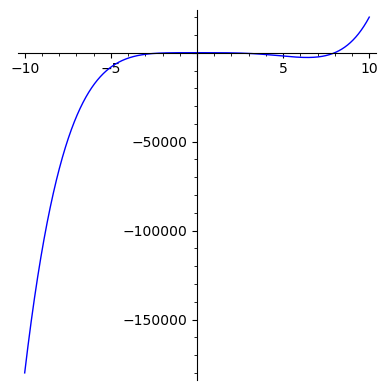

In [8]:
x=var('x')
plot(x^5 - 8*x^4 +x +11,(x,-10,10),figsize=[4,4])

Mamy dwa sugerowane rozwiązania: ``blisko'' zera i w przedziale $[5,10]$. 
Na pewno dwa? To teraz wykanajmy wykres w $[-2,2]$ i ujawnia się trzecie rozwiązanie. 

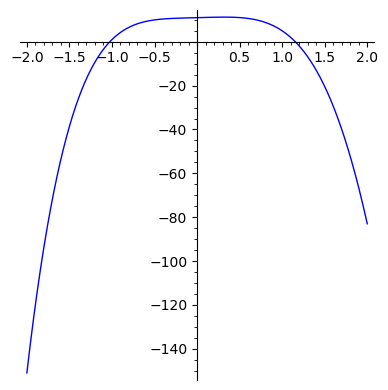

In [9]:
x=var('x')
plot(x^5 - 8*x^4 +x +11,(x,-2,2),figsize=[4,4])

Proszę sprawdzić algorytmem bisekcji (tablica + kalkulator lub program), wartości przybliżone stosując 
algorytm w wyznaczonych (graficznie) przedziałach: $[-2,0]$, $[0,2]$ oraz $[5,10]$.

**Samodzielnie:** Zbadać podobnie równanie $x^3 - 0,165 x^2  + 0,0003993 = 0$. Jeśli w programie, 
to ok. 10-11 kroków... Ponadto: teraz metodą bisekcji rozwiązać rozważane wcześniej trójmiany i porównać 
wyniki z wcześniejszymi obliczeniami.

A tak praktycznie: takie problemy rozwiązuje się algorytmami rekurencyjnymi - powiemy o tym przy okazji 
dalszego tematu - o ciągach rekurencyjnych.

> **Systemy pozycyjne.** Wszyscy wiedzą (?), że komputer nie korzysta z zapisów liczb w systemie dziesiętnym.  
Tu warto przypomnieć, że jeszcze niedawno uczniowie byli nauczani, że liczby wymierne to takie, które mają 
rozwinięcia dziesiętne skończone lub okresowe. 

No to *ćwiczenie* dla wszystkich - ta definicja dotyczy rozwinięć dziesiętnych. CZY również innych? 
Sprawdzić na własnych przykładach lub poniższej prezentacji, czy liczby o rozwinięciu dziesiętnym skończonym 
mają takie np. w rozwinięciu dwójkowym? Jakie są możliwości? No i czy taka definicja była poprawna?

Prezentacja: [konwersja w programie ''Mathematica''](http://mcichon.home.amu.edu.pl/cdf/DecimalToBinaryFloatingPointConversion.cdf)
    

> **Zamiana systemów pozycyjnych.**
              
Prezentacja nie rozstrzyga wszystkiego. To pytanie: w zapisie dziesiętnym liczby wymierne mają rozwinięcia 
skończone lub nieskończone okresowe. A jak jest w zapisie dwójkowym takich liczb? 
Np. $\left(\frac{1}{3}\right)_2$? 

(wskazówka do poszukiwań: ''błędy reprezentacji'')

Tutaj: [też pewna wskazówka (ale nie dowód)... w formacie CDF...](http://mcichon.home.amu.edu.pl/cdf/FractionsInDifferentBases.cdf)


**Ćwiczenia.**  Wykonać ćwiczenie zamiany systemów pozycyjnych:

* $(10)_{10} = (...)_2$ ?
* $(10)_2 = (...)_{10}$ ?
* $(20)_{10} = (...)_{16}$ ?
* $^*$ $(\frac{1}{4})_{10} = (...)_3$ ?
* $(0,(24))_{10} = (...)_2$ ?


**Zadanie (R1):** 

Sprawdzić wyniki bezpośrednim rachunkiem (oraz/lub w programie) stosując arytmetykę dwójkową i trójkową: 
 
$$
\frac{4}{5} + \frac{1}{3}.
$$
        

> **Algorytm Hornera.**  Dana jest dziętna postać liczby rzeczywistej $x$. Aby zakodować tę liczbę w 
systemie o podstawie $q$:

* Przyjmujemy z jaką liczbą miejsc po przecinku (czyli: $n$) chcemy przedstawić liczbę $x$.
* Mnożymy $x$ przez podstawę $q$ systemu podniesioną do potęgi $n$.
* Zaokrąglamy wynik mnożenia do liczby całkowitej, a następnie kodujemy ją w wybranym przez nas systemie o podstawie $q$ tak, jak każdą liczbę całkowitą.
* Oddzielamy ostatnie $n$ liczb przecinkiem.

In [11]:
number = int(input("Wprowadz liczbe dziesietna:\n")) 
print("Liczbie " + str(number) + " w zapisie binarnym (dwojkowym) odpowiada "+bin(number).lstrip("0b").rstrip("L"))

Wprowadz liczbe dziesietna:
 1011


Liczbie 1011 w zapisie binarnym (dwojkowym) odpowiada 1111110011
Exiting Sage (CPU time 0m2.64s, Wall time 11m34.20s).


Narzędzia: [z książki ''Analysis for Computer Scientists'' - polecam!](https://english.mathe-online.at/onlinewerkzeuge.html)